In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import geopandas as gpd


In [ ]:

file_path = '../data/itemsEjec.csv'


data = pd.read_csv(file_path)

drop = ['ID', 'DescripcionItem', 'CantidadItem']

data.drop(drop, axis='columns', inplace=True)

data = data[['Municipio', 'Subregion', 'Longitud_X', 'Latitud_Y', 'tierras', 'areaTierras', 'roca', 'areaRoca', 'concreto', 'areaConcreto', 'pavimento', 'areaPavimento']]

display(data.head())


# Generación de RCD

In [13]:
subDict = {
    'Municipio': list(),
    'Subregion': list(),
    'Type': list(),
    'Cant': list()
}

for i in set(data['Municipio']):
    subDF = data[data['Municipio'] == i]
    for t in ['tierras', 'roca', 'concreto', 'pavimento']:
        subDict['Municipio'].append(i)
        subDict['Subregion'].append(list(subDF['Subregion'])[0])
        subDict['Type'].append(t.replace('tierras', 'tierra'))
        subDict['Cant'].append(subDF[t].sum())

df = pd.DataFrame(subDict)

df.head()

,Municipio,Subregion,Type,Cant
0,TITIRIBI,SUROESTE,tierra,1.035
1,TITIRIBI,SUROESTE,roca,0.580
2,TITIRIBI,SUROESTE,concreto,0.580
3,TITIRIBI,SUROESTE,pavimento,0.000
4,BELMIRA,NORTE,tierra,7.070


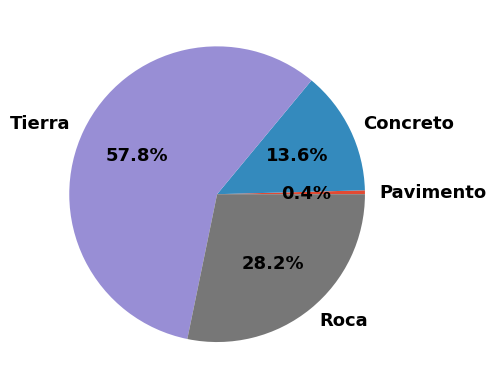

In [ ]:
x = [df[df['Type'] == i]['Cant'].sum() for i in set(df['Type'])]

plt.pie(
    x=x,
    labels=[label.capitalize().replace('Tierras', 'Tierra') for label in set(df['Type'])],
    autopct='%1.1f%%',
    textprops={'fontsize': 13, 'weight': 'bold'}
)

plt.show()

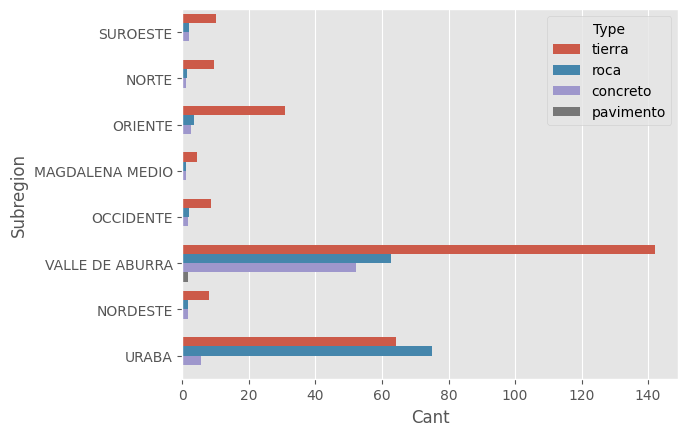

In [15]:
ax = sns.barplot(
    data=df,
    x='Cant',
    y='Subregion',
    hue='Type',
    errorbar=None
)

plt.show()

In [16]:
df.drop(['Municipio'], axis='columns', inplace=True)

df.sort_values('Subregion', axis='index', ascending=False, ignore_index=True, inplace=True)

#df.groupby(by=['Subregion', 'Type']).sum()

In [17]:
gdf = gpd.read_file('Antioquia.gpkg', layer='Subregiones')

gdf.drop(['MpCodigo', 'MpNombre', 'Mp_DISTRIB'], axis='columns', inplace=True)

gdf.drop_duplicates(ignore_index=True, inplace=True)

gdf.sort_values('Mp_SUBREGI', axis='index', ascending=False, ignore_index=True, inplace=True)

newCols = {
    'Type': list(),
    'Cant': list()
}

for s in list(gdf['Mp_SUBREGI']):
    sub = df[df['Subregion'] == s]
    for t in set(df['Type']):
        newCols['Type'].append(t)
        newCols['Cant'].append(sub[sub['Type'] == t]['Cant'].sum())

gdf = pd.concat([gdf]*len(set(df['Type'])), axis='index', ignore_index=True)

gdf.sort_values('Mp_SUBREGI', axis='index', ascending=False, ignore_index=True, inplace=True)

for k,v in newCols.items():
    gdf[k] = v

gdf

,Mp_SUBREGI,geometry,Type,Cant
0,VALLE DE ABURRA,"MULTIPOLYGON (((-75.57319 6.09909, -75.57336 6...",pavimento,18.17750
1,VALLE DE ABURRA,"MULTIPOLYGON (((-75.57319 6.09909, -75.57336 6...",concreto,522.08325
2,VALLE DE ABURRA,"MULTIPOLYGON (((-75.57319 6.09909, -75.57336 6...",tierra,1420.09480
3,VALLE DE ABURRA,"MULTIPOLYGON (((-75.57319 6.09909, -75.57336 6...",roca,626.53040
4,URABA,"MULTIPOLYGON (((-76.91388 6.84541, -76.91425 6...",pavimento,0.27000
5,URABA,"MULTIPOLYGON (((-76.91388 6.84541, -76.91425 6...",concreto,50.57000
6,URABA,"MULTIPOLYGON (((-76.91388 6.84541, -76.91425 6...",tierra,578.99000
7,URABA,"MULTIPOLYGON (((-76.91388 6.84541, -76.91425 6...",roca,675.85500
8,SUROESTE,"MULTIPOLYGON (((-75.73053 5.56338, -75.73128 5...",pavimento,0.01000
9,SUROESTE,"MULTIPOLYGON (((-75.73053 5.56338, -75.73128 5...",concreto,38.84000


In [18]:
gdf.crs

<Geographic 2D CRS: EPSG:4686>
Name: MAGNA-SIRGAS
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Colombia - onshore and offshore. Includes San Andres y Providencia, Malpelo Islands, Roncador Bank, Serrana Bank and Serranilla Bank.
- bounds: (-84.77, -4.23, -66.87, 15.51)
Datum: Marco Geocentrico Nacional de Referencia
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

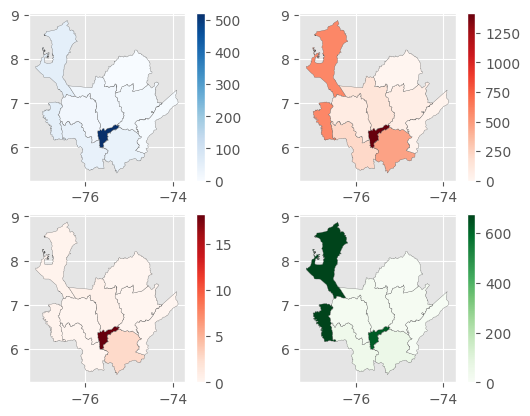

In [20]:
fig, ax = plt.subplots(2, 2)

gdf[gdf['Type'] == 'tierra'].plot(
    column='Cant',
    cmap='Reds',
    legend=True,
    linewidth=0.2,
    edgecolor='#555',
    label='Tierras',
    ax=ax[0, 1]
)

gdf[gdf['Type'] == 'roca'].plot(
    column='Cant',
    cmap='Greens',
    legend=True,
    linewidth=0.2,
    edgecolor='#555',
    label='Roca',
    ax=ax[1, 1]
)

gdf[gdf['Type'] == 'concreto'].plot(
    column='Cant',
    cmap='Blues',
    legend=True,
    linewidth=0.2,
    edgecolor='#555',
    label='Concreto',
    ax=ax[0, 0]
)

gdf[gdf['Type'] == 'pavimento'].plot(
    column='Cant',
    cmap='Reds',
    legend=True,
    linewidth=0.2,
    edgecolor='#555',
    label='Pavimento',
    ax=ax[1, 0]
)

plt.show()

# Aprovechamiento de RCD

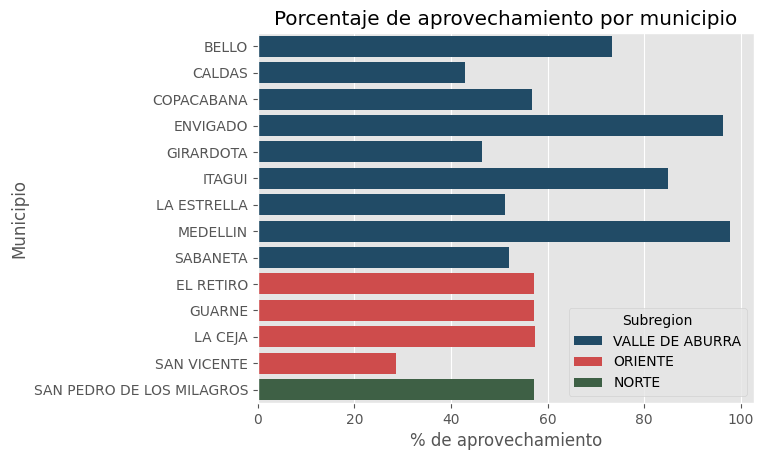

In [21]:
subDict = {
    'Municipio': list(),
    'Subregion': list(),
    'Aprovechamiento': list(),
    'DispFinal': list(),
    'Percent': list()
}

for i in range(0, len(data), 1):
    row = data.iloc[i]
    subDict['Municipio'].append(row['Municipio'])
    subDict['Subregion'].append(row['Subregion'])
    more = 0
    less = 0
    # TIERRAS
    if row['areaTierras']:
        more += row['tierras']
    else:
        less += row['tierras']
    # ROCA
    if row['areaRoca']:
        more += row['roca']
    else:
        less += row['roca']
    # CONCRETO
    if row['areaConcreto']:
        more += row['concreto']
    else:
        less += row['concreto']
    # PAVIMENTO
    if row['areaPavimento']:
        more += row['pavimento']
    else:
        less += row['pavimento']
    subDict['Aprovechamiento'].append(more)
    subDict['DispFinal'].append(less)
    subDict['Percent'].append(100*more/(more + less))

df = pd.DataFrame(subDict)

sns.barplot(
    data=df[df['Percent'] > 0].sort_values(by=['Subregion', 'Municipio'], ascending=[False, True]),
    x='Percent',
    y='Municipio',
    hue='Subregion',
    errorbar=None,
    palette=sns.color_palette(['#154D71', '#E43636', '#386641'])
)

plt.title('Porcentaje de aprovechamiento por municipio')
plt.xlabel('% de aprovechamiento')

plt.show()

In [22]:
percent = 100*df['Aprovechamiento'].sum() / (df['Aprovechamiento'].sum() + df['DispFinal'].sum())

print('El porcentaje general de aprovechamiento de RCD en Antioquia fue del ' + str(round(percent, 2)) + '%')

El porcentaje general de aprovechamiento de RCD en Antioquia fue del 45.64%


In [23]:
gdf = gpd.read_file('Antioquia.gpkg', layer='Municipios')

noEPM = set(gdf['MpNombre']) - set(df['Municipio'])

for i in list(noEPM):
    subDict['Municipio'].append(i)
    subDict['Subregion'].append(list(gdf[gdf['MpNombre'] == 'MEDELLIN']['Mp_SUBREGI'])[0])
    subDict['Aprovechamiento'].append(0)
    subDict['DispFinal'].append(0)
    subDict['Percent'].append(0)

df = pd.DataFrame(subDict).groupby(['Municipio', 'Subregion']).mean()

gdf = gdf.merge(df, left_on='MpNombre', right_on='Municipio', sort=True)

gdf.describe()

,Aprovechamiento,DispFinal,Percent
count,125.000000,125.000000,125.000000
mean,0.020623,0.344286,5.065711
std,0.080286,0.514523,17.865154
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.313906,0.000000
75%,0.000000,0.452308,0.000000
max,0.553550,5.216079,97.814509


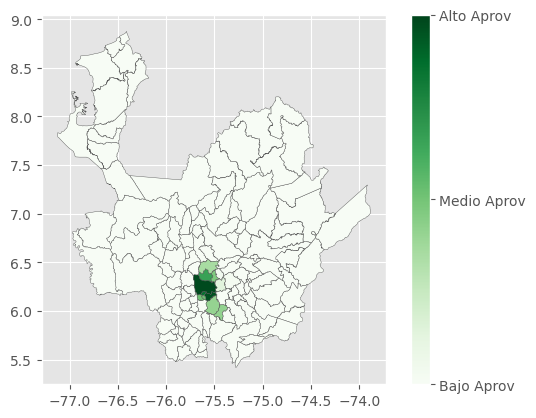

In [24]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

# Plot del mapa
ax = gdf.plot(
    column='Percent',
    cmap='Greens',
    legend=False,  # Disable default legend
    vmin=0, vmax=100,
    linewidth=0.3,
    edgecolor='#555',
    ax=plt.gca() # Explicitly get current axes
)

# Título
#plt.title('Distribución espacial del aprovechamiento de los RCD')

# Create a scalar mappable for the colorbar
sm = cm.ScalarMappable(cmap='Greens', norm=mpl.colors.Normalize(vmin=0, vmax=100))
sm._A = [] # Required for ScalarMappable to work with colorbar

# Add colorbar to the axes
cbar = plt.colorbar(sm, ax=ax)

# Set colorbar ticks and labels
cbar.set_ticks([0, 50, 100])
cbar.set_ticklabels(['Bajo Aprov', 'Medio Aprov', 'Alto Aprov'])

plt.show()